In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import animation
import numpy as np

In [2]:
from matplotlib import rc
rc('animation', html='jshtml')

In [3]:
#list of leagues
leagues = os.listdir("Data")
#list of seasons
seasons = os.listdir(os.path.join("Data",leagues[0]))
#list of tables
tables = os.listdir(os.path.join(*["Data", leagues[0], seasons[0]]))

In [4]:
tables

['stage-attempt-directions-against.csv',
 'stage-attempt-directions-for.csv',
 'stage-attempt-zones-against.csv',
 'stage-attempt-zones-for.csv',
 'stage-cards.csv',
 'stage-goals-against.csv',
 'stage-goals-for.csv',
 'stage-passes-against.csv',
 'stage-passes-for.csv',
 'stage-team-stats-defensive.csv',
 'stage-team-stats-detailed.csv',
 'stage-team-stats-offensive.csv',
 'stage-team-stats-summary.csv',
 'stage-touch-channels.csv',
 'stage-touch-zones.csv']

In [5]:
#names of data files
Defense_datafile = 'stage-team-stats-defensive.csv'
Action_side_datafile = 'stage-touch-channels.csv'
Action_zone_datafile = 'stage-touch-zones.csv'
Summary_datafile = 'stage-team-stats-summary.csv'

In [6]:
def get_avg_stats(leagues, seasons, data_file_name, attrs, n_top_teams = 0, ranking_file_name = None):
    avg_stats = {}
    
    for league in leagues:
        avgs = []
        for season in seasons[:]:
            
            if n_top_teams >0 and ranking_file_name is not None:
                ranking = pd.read_csv(os.path.join(*['Data', league,season,ranking_file_name]))
                top_teams = ranking.head(n_top_teams)['Team'].tolist()
                top_teams = [' '.join(i.split()[1:]) for i in top_teams]
            
            
            df = pd.read_csv(os.path.join(*['Data', league, season, data_file_name]))
                
            if n_top_teams >0:
                df = df[df['Team'].isin(top_teams)]
            
            for attr in attrs:
                df[attr] = df[attr].map(lambda x: round(float(str(x)[:-1])/100,2))
            avg = df[attrs].mean().tolist()
            avg.append(season)
            avgs.append(avg)
        avg_df = pd.DataFrame(avgs, columns = attrs+['season'])
        avg_stats[league]= avg_df

    return avg_stats

In [7]:
def get_avg_stats_mul_leagues(avg_each_league, leagues):
    avg_all_leagues_df = None 
    for league in leagues:
        if avg_all_leagues_df is None:
            avg_all_leagues_df = avg_each_league[league].drop(columns = ['season'])
        else:
            avg_all_leagues_df.add(avg_each_league[league].drop(columns = ['season']), fill_value = 0)

    avg_all_leagues_df['season'] = avg_each_league[league]['season']
    return avg_all_leagues_df

In [8]:
def action_sides_animation(acs_avg_stats):
    seasons = acs_avg_stats['season']
    fig, (ax1,ax2) = plt.subplots(2, 1, figsize = (8, 8))

    x = ["Left Side", "Middle of the pitch", "Right Side"]

    def barlist(i): 
        return acs_avg_stats.loc[[i]].values.tolist()[0][:-1]

    labels = seasons
    mid = acs_avg_stats["Middle of the pitch"].tolist()

    roof = max(mid) +0.01
    ax1.set_ylim(0,roof+0.15)
    ax1.set_ylabel('proportion')

    ax1.set_title('Mid vs Sides, Season ')
    # ax1.legend()
    bars = ax1.bar(x,barlist(0))
    bars[1].set_color('g')

    ax2.set_ylim(0.2,roof) # fix the y axis
    ax2.bar(labels, [0]*(len(seasons)), label='Mid', color = 'g')
    for label in ax2.get_xticklabels(): 
        label.set_rotation(22)
    ax2.set_ylabel('proportion')
    ax2.set_title('Mid vs Sides')
#     ax2.legend()

    def animate(i):
        ax1.cla()  # clear the previous image  
        ax1.set_ylim(0,roof+0.15)
        ax1.set_ylabel('proportion')

        ax1.set_title('Mid vs Sides, Season '+str(seasons[i]))
        ax1.legend()
        bars = ax1.bar(x,barlist(i))
        bars[1].set_color('g')

        ax2.cla()
        ax2.set_ylim(0.2,roof) # fix the y axis
        ax2.bar(labels, mid[:i+1]+[0]*(len(seasons)-i-1), label='Mid', color = 'g')
    #     ax2.bar(labels, sides[:i]+[0]*(len(seasons)-i), bottom=mid,
    #            label='Sides')

        ax2.tick_params(axis='x', labelsize= 8, rotation = 20)
        ax2.set_ylabel('proportion')
        ax2.set_title('Mid by time')

#         ax2.legend()

    anim = animation.FuncAnimation(fig, animate,repeat = False, frames = len(seasons), interval = 400, blit = True)
    return anim
#     plt.show()

In [9]:
def action_zones_animation(acz_avg_stats):
    seasons = acz_avg_stats['season']
    fig, (ax1,ax2) = plt.subplots(2, 1, figsize = (8, 8))

    x = ['Own Third','Middle Third','Opposition Third']

    def barlist(i): 
        return acz_avg_stats.loc[[i]].values.tolist()[0][:-1]

    labels = seasons
    mid = acz_avg_stats['Middle Third'].tolist()

    roof = max(mid) +0.01
    ax1.set_ylim(0,roof+0.15)
    ax1.set_ylabel('proportion')

    ax1.set_title('Action zones, Season ')
    # ax1.legend()
    bars = ax1.bar(x,barlist(0))
    bars[1].set_color('g')

    ax2.set_ylim(0.2,roof) # fix the y axis
    ax2.bar(labels, [0]*(len(seasons)), label='Mid', color = 'g')
    for label in ax2.get_xticklabels(): 
        label.set_rotation(22)
    ax2.set_ylabel('proportion')
    ax2.set_title('Action zones')
#     ax2.legend()

    def animate(i):
        ax1.cla()  # clear the previous image  
        ax1.set_ylim(0,roof+0.15)
        ax1.set_ylabel('proportion')

        ax1.set_title('Action zones, Season '+str(seasons[i]))
        ax1.legend()
        bars = ax1.bar(x,barlist(i))
        bars[1].set_color('g')

        ax2.cla()
        ax2.set_ylim(0.2,roof) # fix the y axis
        ax2.bar(labels, mid[:i+1]+[0]*(len(seasons)-i-1), label='Mid', color = 'g')
    #     ax2.bar(labels, sides[:i]+[0]*(len(seasons)-i), bottom=mid,
    #            label='Sides')

        ax2.tick_params(axis='x', labelsize= 8, rotation = 20)
        ax2.set_ylabel('proportion')
        ax2.set_title('Mid by time')

#         ax2.legend()

    anim = animation.FuncAnimation(fig, animate,repeat = False, frames = len(seasons), interval = 400, blit = True)
    return anim
#     plt.show()

# Defense

In [10]:
def_attrs = ['Shots pg','Tackles pg','Interceptions pg','Fouls pg','Offsides pg']
def_avg_stats = get_avg_stats(leagues, seasons, Defense_datafile, def_attrs)

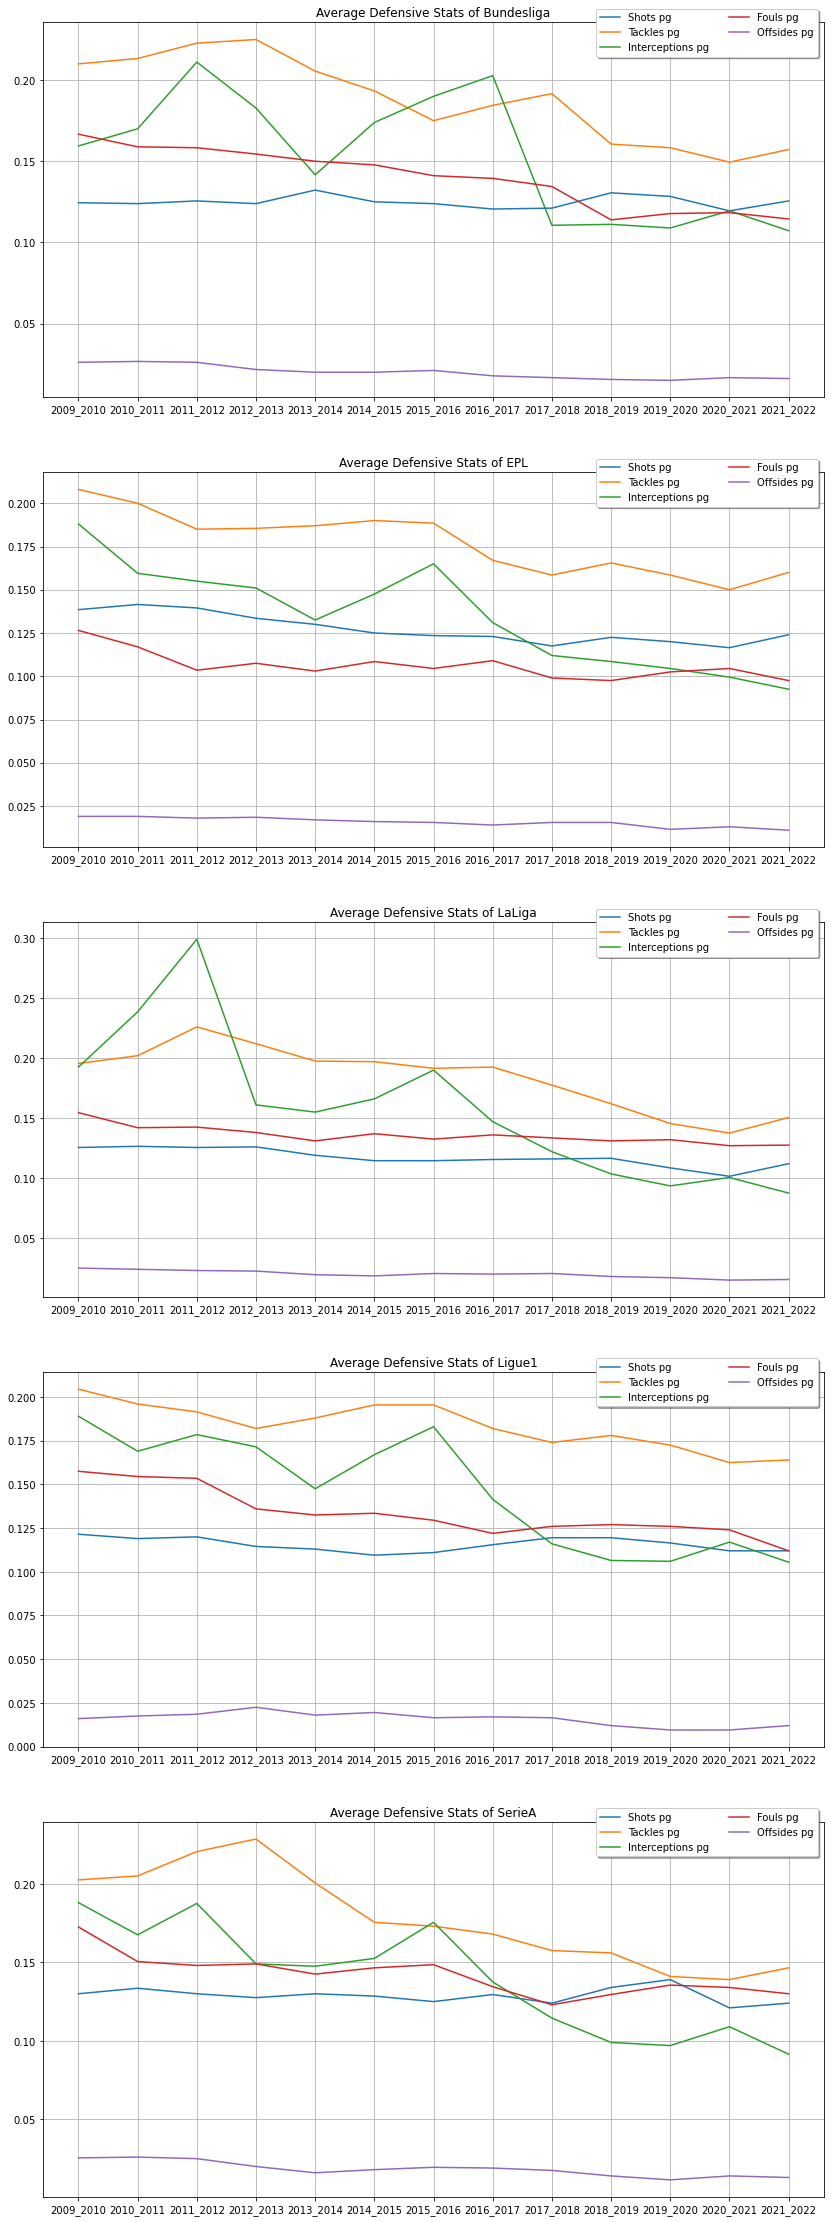

In [11]:
fig, ax = plt.subplots(len(leagues), figsize = (14,8*5))
for i in range(len(leagues)):

    def_avg_df = def_avg_stats[leagues[i]]
    

    for attr in def_attrs:
        ax[i].plot(def_avg_df['season'], def_avg_df[attr], label = attr)

    ax[i].legend(loc='upper center', bbox_to_anchor=(0.85, 1.05),
              ncol=2, fancybox=True, shadow=True)
    ax[i].grid()
    ax[i].title.set_text('Average Defensive Stats of '+leagues[i])
plt.show()

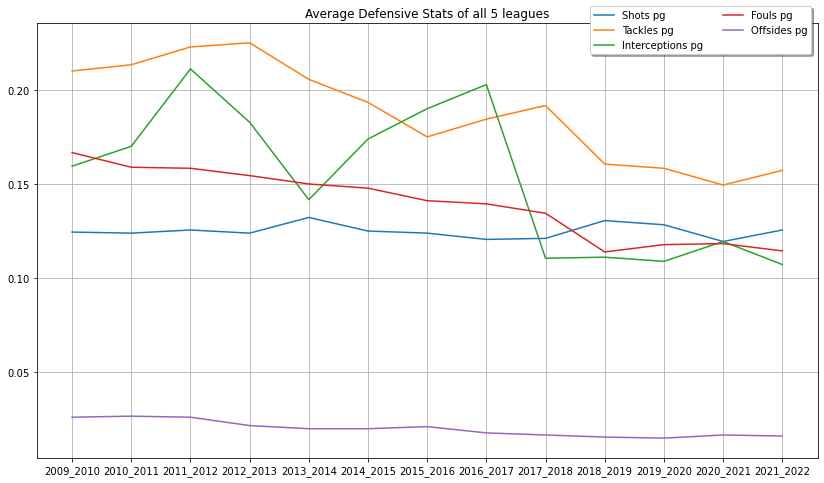

In [12]:
def_avg_stats_all = get_avg_stats_mul_leagues(def_avg_stats, leagues)

figure(figsize=(14, 8))

for attr in def_attrs:
    plt.plot(def_avg_stats_all['season'], def_avg_stats_all[attr], label = attr)

plt.legend(loc='upper center', bbox_to_anchor=(0.85, 1.05),
          ncol=2, fancybox=True, shadow=True)
plt.grid()
plt.title('Average Defensive Stats of all 5 leagues')
plt.show()   

# Action Sides

In [13]:
acs_attrs = ["Left Side", "Middle of the pitch", "Right Side"]
acs_avg_stats = get_avg_stats(leagues, seasons, Action_side_datafile, acs_attrs)

<IPython.core.display.Javascript object>


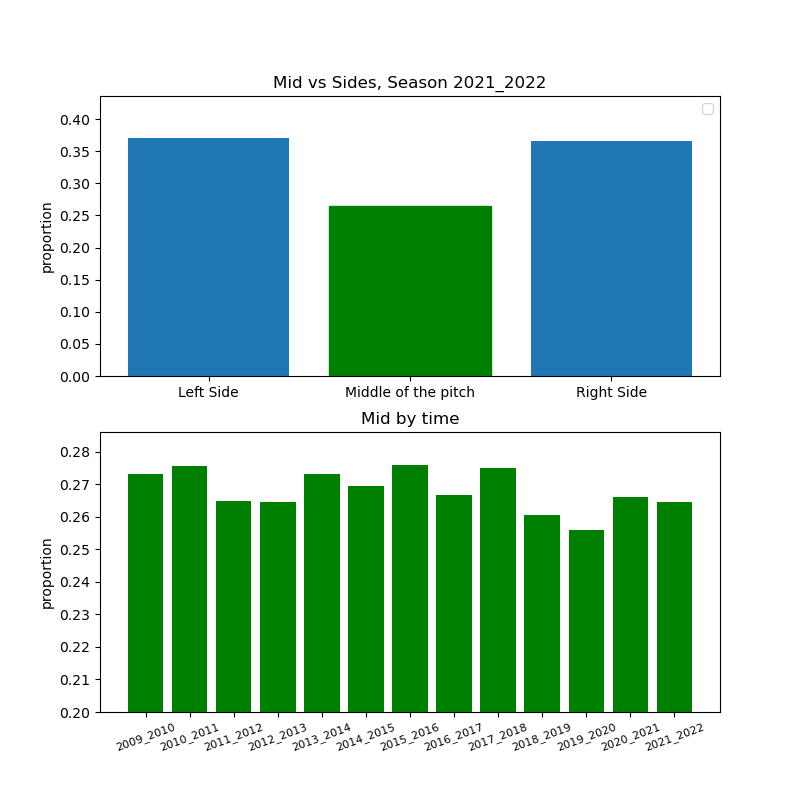

In [51]:
%matplotlib notebook
omit_return = action_sides_animation(acs_avg_stats['Bundesliga'])

<IPython.core.display.Javascript object>


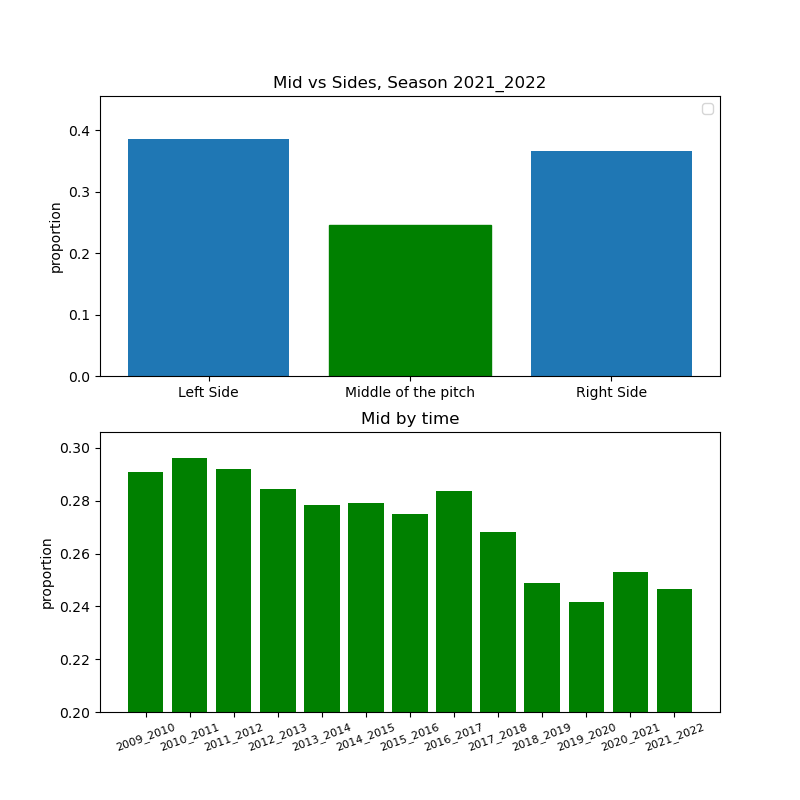

In [50]:
%matplotlib notebook
omit_return = action_sides_animation(acs_avg_stats['EPL'])

<IPython.core.display.Javascript object>


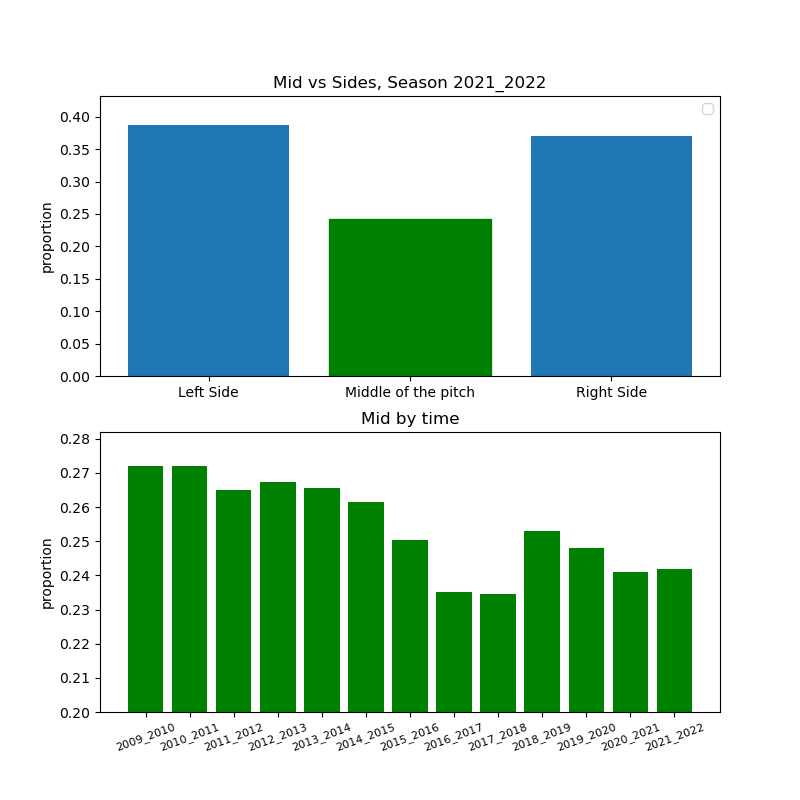

In [49]:
%matplotlib notebook
omit_return = action_sides_animation(acs_avg_stats['LaLiga'])

<IPython.core.display.Javascript object>


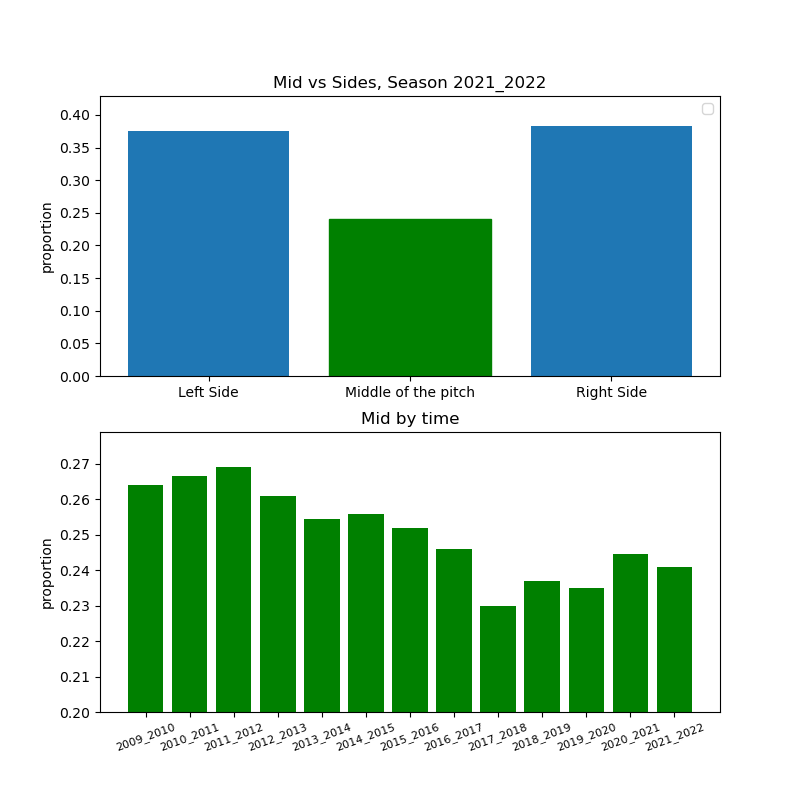

In [48]:
%matplotlib notebook
omit_return = action_sides_animation(acs_avg_stats['Ligue1'])

<IPython.core.display.Javascript object>


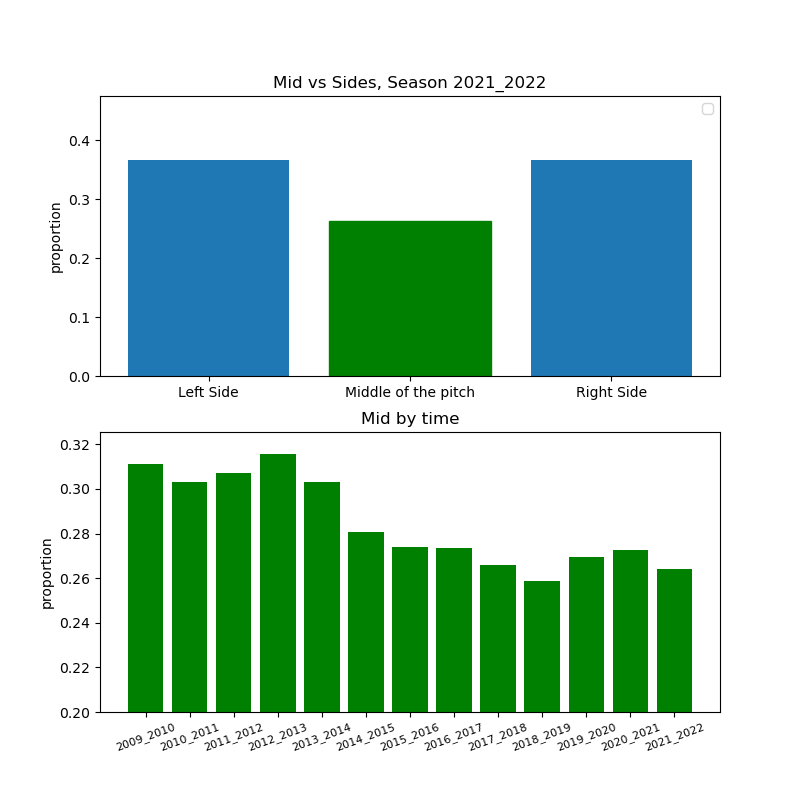

In [47]:
%matplotlib notebook
omit_return = action_sides_animation(acs_avg_stats['SerieA'])

<IPython.core.display.Javascript object>


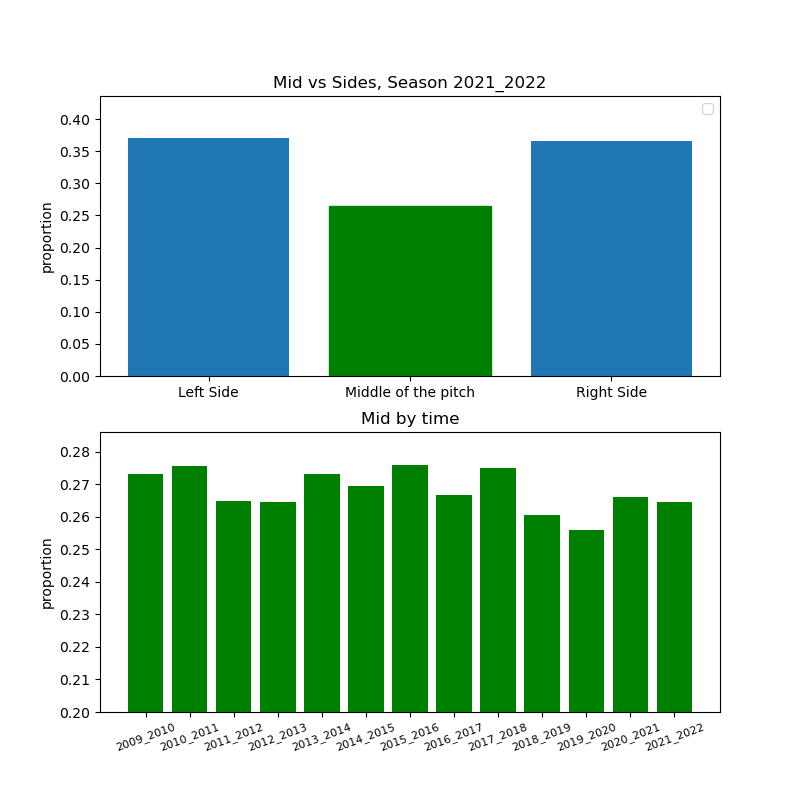

In [46]:
omit_return = action_sides_animation(get_avg_stats_mul_leagues(acs_avg_stats, leagues))

<IPython.core.display.Javascript object>


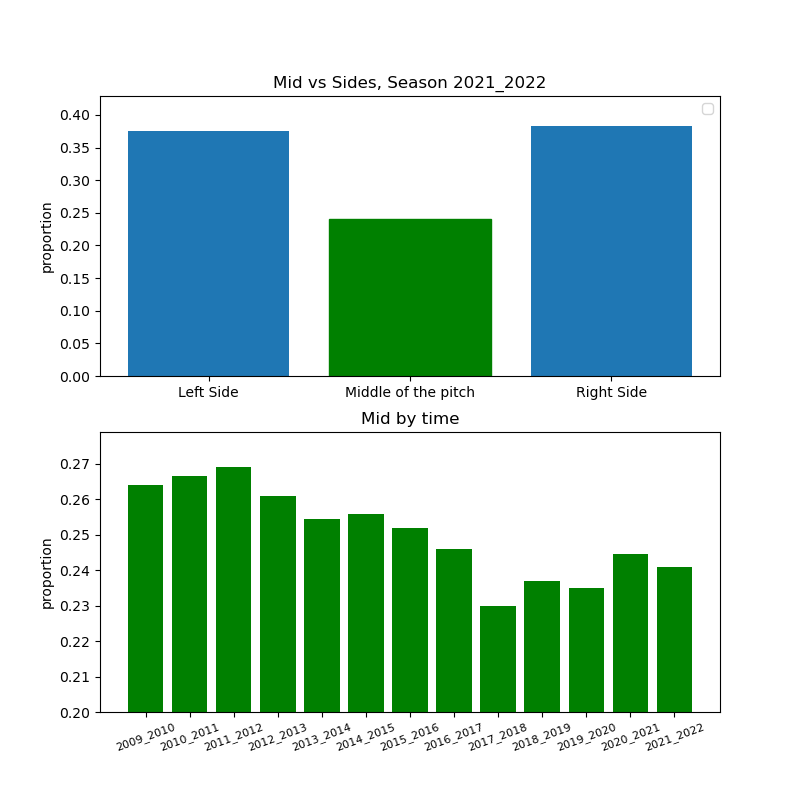

In [45]:
omit_return = action_sides_animation(get_avg_stats_mul_leagues(acs_avg_stats, set(leagues) - set(['Bundesliga'])))

# Zones

In [21]:
acz_attrs = ['Own Third','Middle Third','Opposition Third']

In [38]:
acz_avg_stats = get_avg_stats(leagues, seasons, Action_zone_datafile, acz_attrs, n_top_teams = 6, ranking_file_name = Summary_datafile)

<IPython.core.display.Javascript object>


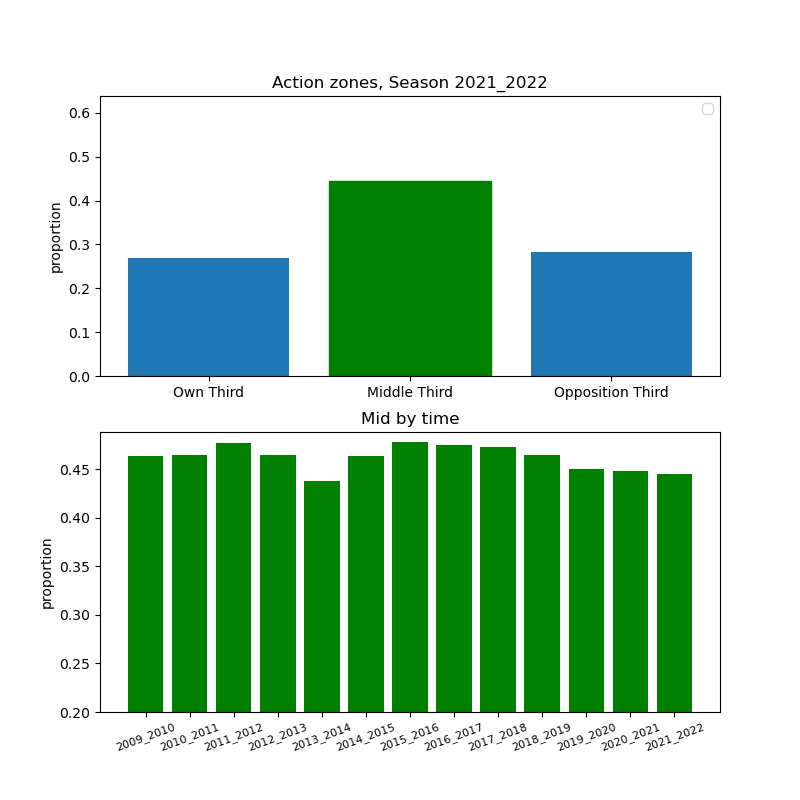

In [39]:
%matplotlib notebook
omit_return = action_zones_animation(acz_avg_stats['Bundesliga'])

<IPython.core.display.Javascript object>


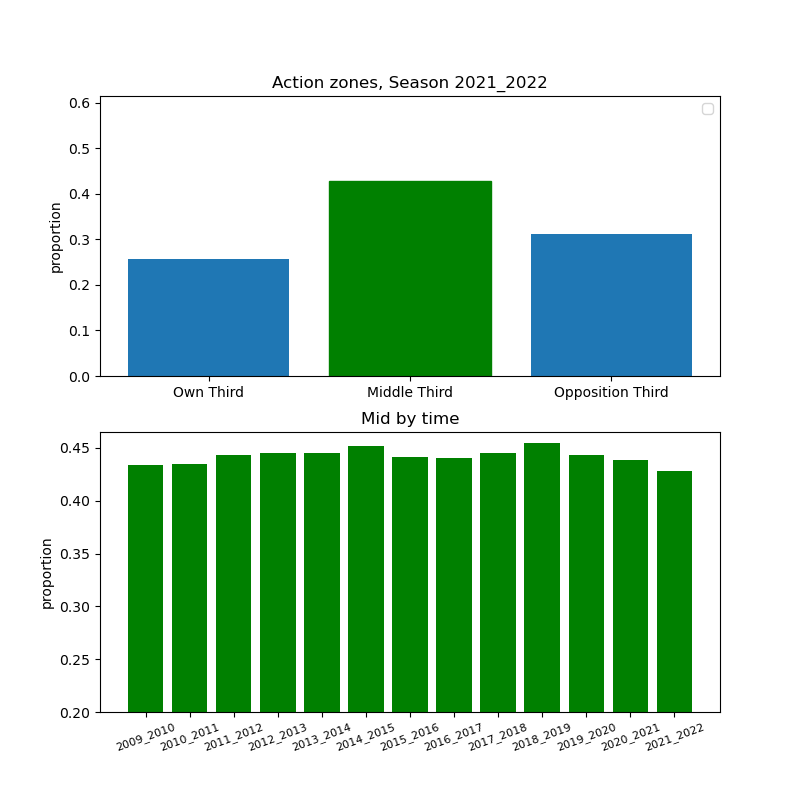

In [40]:
%matplotlib notebook
omit_return = action_zones_animation(acz_avg_stats['EPL'])

<IPython.core.display.Javascript object>


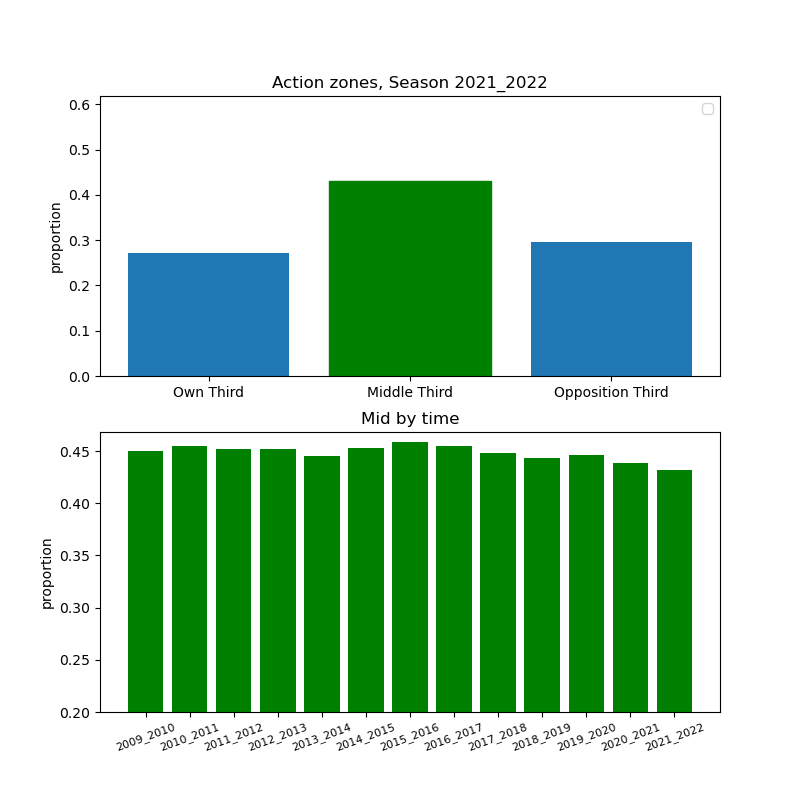

In [41]:
%matplotlib notebook
omit_return = action_zones_animation(acz_avg_stats['LaLiga'])

<IPython.core.display.Javascript object>


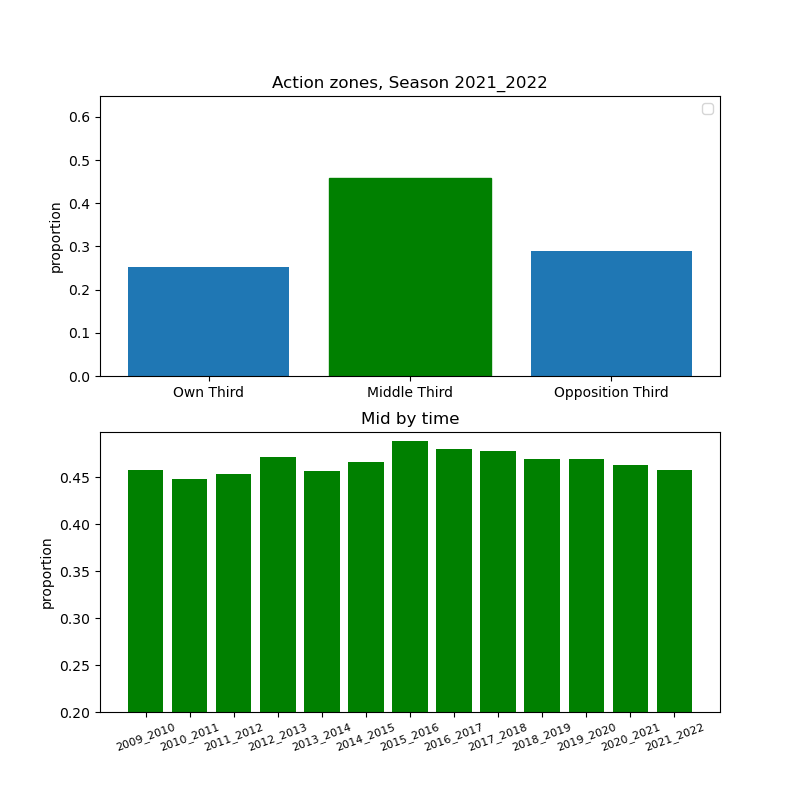

In [42]:
%matplotlib notebook
omit_return = action_zones_animation(acz_avg_stats['Ligue1'])

<IPython.core.display.Javascript object>


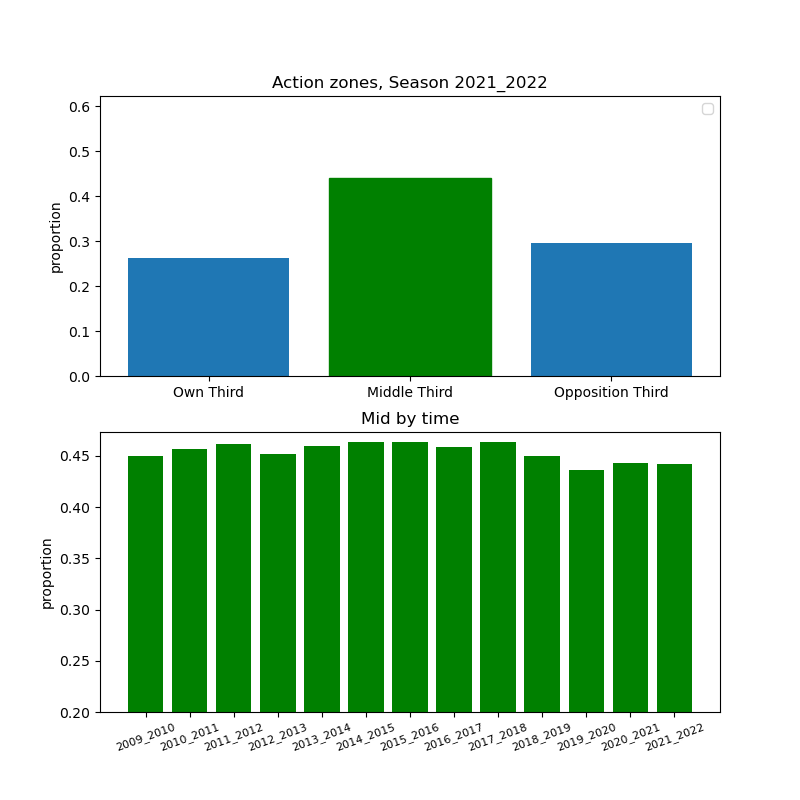

In [43]:
%matplotlib notebook
omit_return = action_zones_animation(acz_avg_stats['SerieA'])

<IPython.core.display.Javascript object>


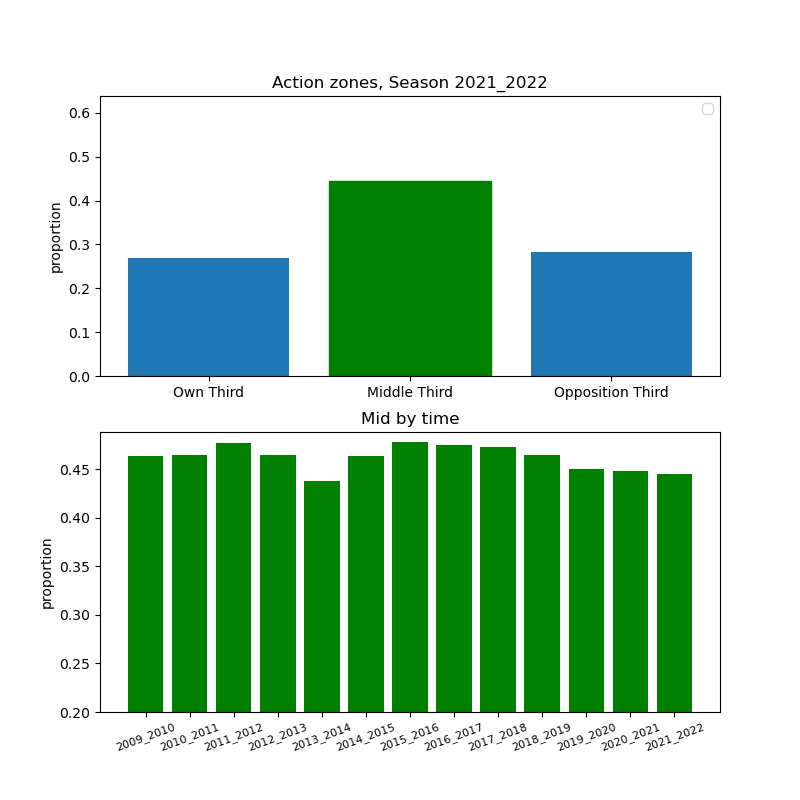

In [44]:
omit_return = action_zones_animation(get_avg_stats_mul_leagues(acz_avg_stats, leagues))